In [2]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

1.

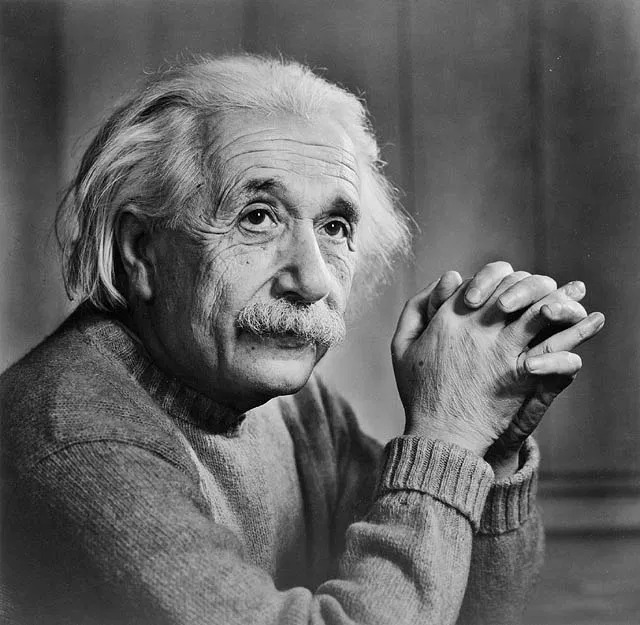

In [3]:
img = cv2.imread('/content/einstein.jpg', 0)
cv2_imshow(img)

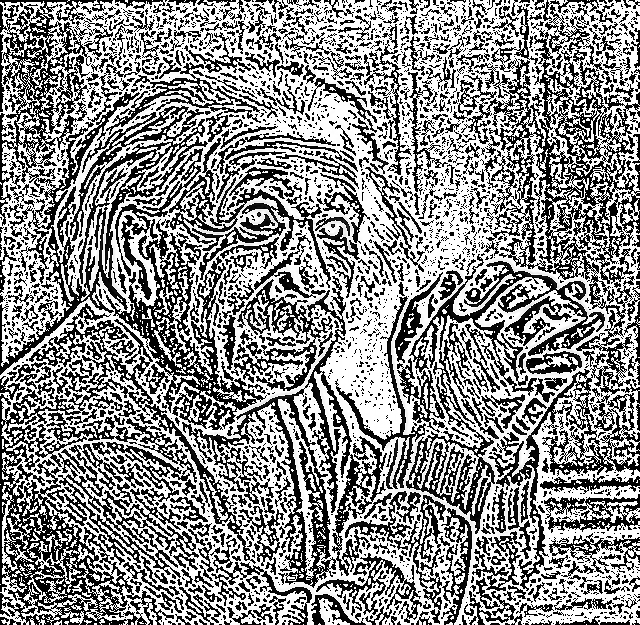

In [4]:
img1 = cv2.GaussianBlur(img, (5, 5), 0)
img2 = cv2.GaussianBlur(img, (9, 9), 0)
img_edge = img1-img2
cv2_imshow(img_edge)

2.

In [5]:
ref = cv2.imread('/content/Barrel_reference.png', 1)
hsv_ref = cv2.cvtColor(ref, cv2.COLOR_BGR2HSV)

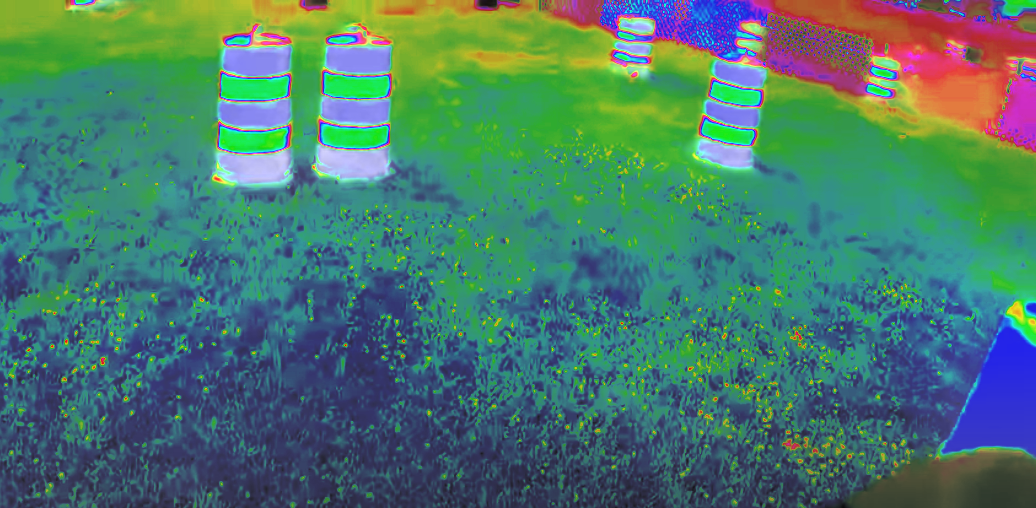

In [6]:

frame = cv2.imread('/content/test.png', 1)
hsv_vid = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([hsv_vid], [0, 1], None, [180, 256], [0, 180, 0, 256])
norm = cv2.normalize(hist, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
ret, thresh = cv2.threshold(norm,127,255,cv2.THRESH_BINARY)
res = cv2.calcBackProject([hsv_vid],[0,1],thresh,[0,180,0,256],1)
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
img = cv2.filter2D(res, -1, disc, res)
final = cv2.merge((img, img, img))
result = cv2.bitwise_or(cv2.cvtColor(frame, cv2.COLOR_HSV2RGB), final)
cv2_imshow(result)